In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Lorenz system parameters
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 200.0)
p = [10.0, 28.0, 8/3]

# Define Lorenz system
def lorenz(t, u):
    du = np.zeros(3)
    du[0] = p[0] * (u[1] - u[0])
    du[1] = u[0] * (p[1] - u[2]) - u[1]
    du[2] = u[0] * u[1] - p[2] * u[2]
    return du

# Solve and take data
sol = solve_ivp(lorenz, tspan, u0, t_eval=np.linspace(tspan[0], tspan[1], int(200/0.02)))

data = sol.y

shift = 300
train_len = 5000
predict_len = 1250

# One step ahead for generative prediction
input_data = data[:, shift:shift+train_len-1]
train_target = data[:, shift+1:shift+train_len]

test = data[:, shift+train_len:shift+train_len+predict_len-1]


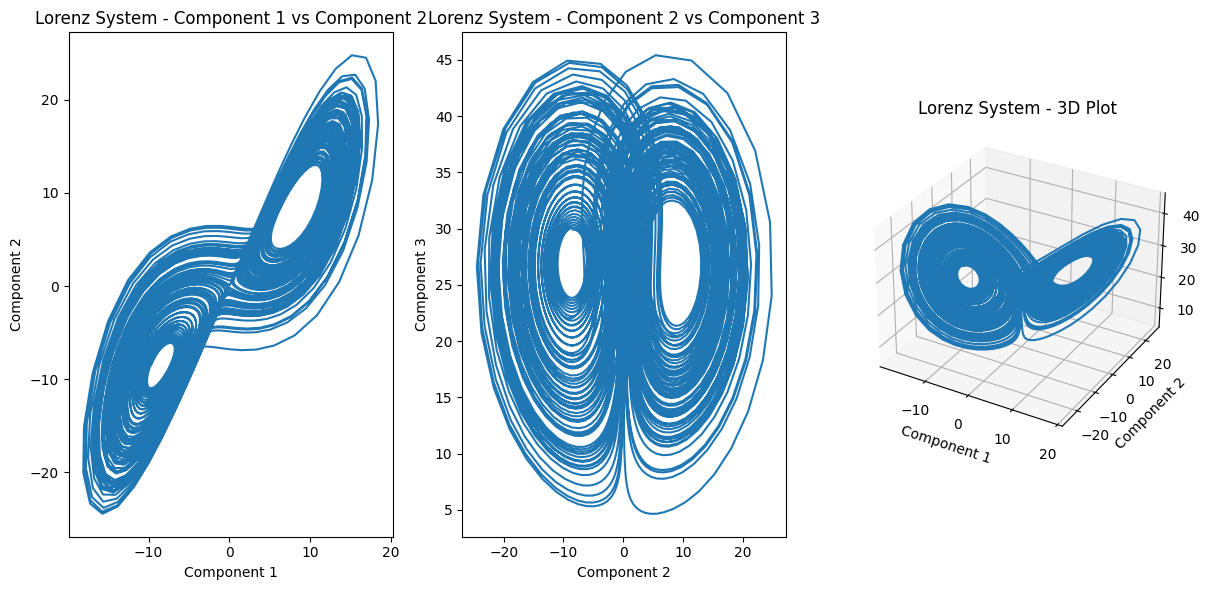

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the Lorenz system data
fig = plt.figure(figsize=(12, 6))

# Plot the first component of the data
plt.subplot(131)
plt.plot(input_data[0], input_data[1], label='Input Data')
plt.title('Lorenz System - Component 1 vs Component 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Plot the second component of the data
plt.subplot(132)
plt.plot(input_data[1], input_data[2], label='Input Data')
plt.title('Lorenz System - Component 2 vs Component 3')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

# Create a 3D plot of all three components
ax = fig.add_subplot(133, projection='3d')
ax.plot(input_data[0], input_data[1], input_data[2], label='Input Data')
ax.set_title('Lorenz System - 3D Plot')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.tight_layout()
plt.show()
